<a href="https://colab.research.google.com/github/riyamotwaniii/bml-exp-1-12/blob/main/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Accuracy: 100.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



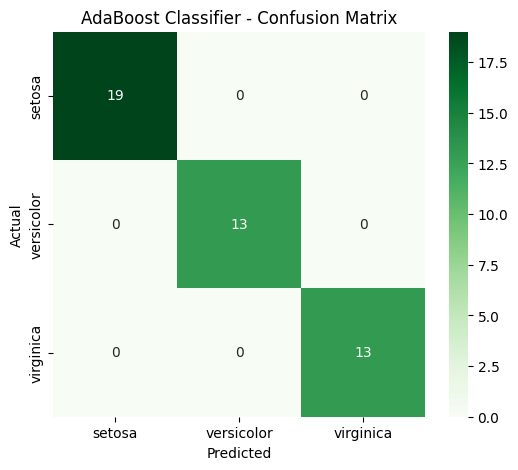

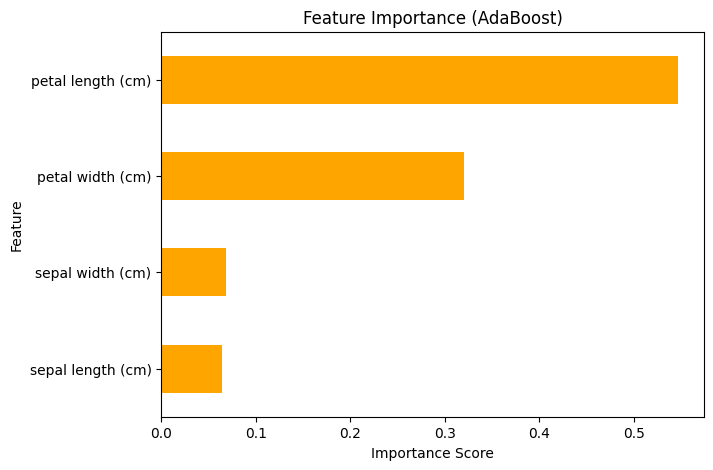

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Initialize AdaBoost model
# Using Decision Tree stumps (depth=1) as weak learners
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
ada_model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,          # number of weak learners
    learning_rate=1.0,         # step size
    random_state=42
)

# Step 5: Train the AdaBoost model
ada_model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = ada_model.predict(X_test)

# Step 7: Evaluation
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=target_names, yticklabels=target_names)
plt.title("AdaBoost Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Feature Importance Visualization
feature_importances = pd.Series(ada_model.feature_importances_, index=feature_names).sort_values(ascending=True)
plt.figure(figsize=(7,5))
feature_importances.plot(kind='barh', color='orange')
plt.title("Feature Importance (AdaBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
